

# Project: Investigate relationship between movie caracteristics and revenue

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The dataset we are about to analyse contains a serie of movies with theirs characteristics such as cast, release year, vote, average vote, budget, and also the revenue generated 
by each movie. During the analysis, we will try to answer questions like: which type of movie are more popular from year to year? What are the properties associated with movies with high revenues? Do all popular movie always generate high revenue? In order to do that, the first thing to do would be to have a look at the data. For this, we will use numpy, pandas, matplotlib and seaborn.

In [1]:
# Importing useful librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load the data in Jupiter notebook and see what it looks like.

### General Properties

In [2]:
# Loading your data and print out a few lines. Then, performing operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


>**1**- The last two colums of the dataset show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over
time.We won't need those columns and we will drop them.

>Now that we have an idea of what the dataset looks like let's discover how many column and rows we have.

In [3]:
df.shape

(10866, 21)

>We have 10866 rows and 21 columns. Let's see if we have some missing value.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>**2**-We have few columns with missing values. For some of those, it will not be possible (or it will not make sense) to replace them by mean values. It is the case for: cast, homepage, director, tagline, keywords, overview, production_companies. We will drop all those. 

>**3**-On the other hand, we have columns like genres which migh be usefull to the analysis, but has 23 missing values. We will keep the column, but drop the rows with missing values.

>**4**-We have 2 id columns: id and imdb_id with few values missing. we will see if the first id has duplicated by checking the number of unique values. if every single value is unique, we will keep id column and drop the imdb_id column.

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
sum(df.duplicated())

1

>**5**- We have one duplicated id, but that is because we have one duplicated row. We will drop it during the cleaning process and check if we still have that duplicated id. Now, let's have a look at some statistics.

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Looking at the statistics, we can see that more than 50% of movies are not very popular. Furthermore, more than 50% have revenue and budget equal to zero. Are they real figures or are they just missing? Let's have a closer look.

In [8]:
df.query('revenue == "0"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0


In [9]:
df.query('budget == "0"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


>**6**- We have 6016 rows with revenue=0 and and 5696 rows with budget=0. In some cases, the revenue is very high and the budget is equal to 0 and in other cases budget is very high and revenue is equal to 0. This is probably because those values are just missing or were not entered properly. Since the amount of row is too high, we will replace those zeros by the mean and keep the rows.

>Now let's have a look at the number of movie directors, the different genres and the different cast bundles.

In [10]:
df[['director', 'genres', 'cast']][1:10]

,director,genres,cast
1,George Miller,Action|Adventure|Science Fiction|Thriller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2,Robert Schwentke,Adventure|Science Fiction|Thriller,Shailene Woodley|Theo James|Kate Winslet|Ansel...
3,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4,James Wan,Action|Crime|Thriller,Vin Diesel|Paul Walker|Jason Statham|Michelle ...
5,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...
6,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...
7,Ridley Scott,Drama|Adventure|Science Fiction,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...
8,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...
9,Pete Docter,Comedy|Animation|Family,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...


In [11]:
df['director'].nunique()

5067

In [12]:
df['genres'].nunique()

2039

In [13]:
df['cast'].nunique()

10719

>**7**-The column with the least uniques values  is genres. It can also help answer some of our questions. The 2 other columns would be difficult to analyse because the number of unique directors is too high, and the cast bundles are very diverse.
However, in order to make a good analysis, we will group the genres in a smaller amount of category.

>Without any further investigation, we will clean the data in the next section.


## Data Cleaning

> in this section, we will drop unuseful columns, remove rows with missing values, remove duplicates, replaces nulls with mean in budget and revenue columns, group different genres in a reduced number of category.

### Drop columns

In [14]:
df.drop(['cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


### Remove duplicate

In [15]:
#removing duplicate and printing the number of dupliacte to verify if everything has been removed.
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [16]:
# Checking the number od id to verify that the duplicated id has been removed too.
sum(df['id'].duplicated())

0

In [17]:
# Dropping the unuseful id column
df.drop(['imdb_id'], axis=1, inplace=True)

In [18]:
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


### Remove rows with null values

In [19]:
#Identifying which column has null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [20]:
#Dropping all null values
df.dropna(inplace=True)

In [21]:
#Checking if everything is gone
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

### Replace null values with mean in revenue and budget columns

In [22]:
# mean revenue
mean_rev = df['revenue'].mean()
mean_rev

39911384.050451949

In [23]:
# replacing zero values with mean values 
df['revenue'] = df.revenue.mask(df.revenue == 0, mean_rev)

In [24]:
# verifying that all zore values have been replaced
df.query('revenue == "0"')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year


In [25]:
# mean budget
mean_bud = df['budget'].mean()
mean_bud

14655309.268492898

In [26]:
# replacing zero values with mean values 
df['budget'] = df.budget.mask(df.budget == 0, mean_bud)

In [27]:
# verifying that all zore values have been replaced
df.query('budget == "0"')

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year


### Regrouping genres in bigger groups of genre

In [28]:
# Calculating the number of uniqes genre
df['genres'].nunique()

2039

In [29]:
#Count of record per unqiue genre
df.groupby(['genres']).count()['id']

genres
Action                                                 63
Action|Adventure                                       15
Action|Adventure|Animation                              4
Action|Adventure|Animation|Comedy|Drama                 1
Action|Adventure|Animation|Comedy|Family                1
Action|Adventure|Animation|Drama|Family                 1
Action|Adventure|Animation|Family                       3
Action|Adventure|Animation|Family|Fantasy               3
Action|Adventure|Animation|Family|Mystery               1
Action|Adventure|Animation|Family|Science Fiction       4
Action|Adventure|Animation|Fantasy                      1
Action|Adventure|Animation|Fantasy|Horror               1
Action|Adventure|Animation|Fantasy|Science Fiction      2
Action|Adventure|Animation|Science Fiction              4
Action|Adventure|Animation|Science Fiction|Crime        1
Action|Adventure|Animation|Science Fiction|Thriller     1
Action|Adventure|Comedy                                33
Action|

>Since the amount of genres is too high, we will only consider the first named in the list.

In [30]:
#splitting genre and retaining the first listed
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [31]:
# Checking the amount of genres
df['genres'].nunique()

20

In [32]:
# Checking the amount of record per genres
df_genres = df.groupby(['genres']).count()['id']
df_genres

genres
Action             1590
Adventure           586
Animation           403
Comedy             2319
Crime               380
Documentary         432
Drama              2453
Family              144
Fantasy             272
Foreign               9
History              44
Horror              915
Music               100
Mystery             125
Romance             186
Science Fiction     214
TV Movie             78
Thriller            491
War                  59
Western              42
Name: id, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

>Now that our data is clean, we will use some visualisations to get some insight which might help answer our questions in the introduction.

### Research Question 1: Which type of movie are more popular from year to year?
>In this section, we will analyse movies with high popularity, which are movies with popularity higher that the mean.

In [33]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action,4/1/15,2947,7.3,2015


In [34]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000
mean,65870.675521,0.647461,2.232495e+07,6.197271e+07,102.138443,217.823649,5.974064,2001.314794
std,91981.355752,1.001032,2.803615e+07,1.111273e+08,31.294612,576.180993,0.934257,12.813617
min,5.000000,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10589.250000,0.208210,1.465531e+07,3.991138e+07,90.000000,17.000000,5.400000,1995.000000
50%,20557.000000,0.384532,1.465531e+07,3.991138e+07,99.000000,38.000000,6.000000,2006.000000
75%,75186.000000,0.715393,1.500000e+07,3.991138e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [35]:
df['release_year'].nunique()

56

>The release_year column has 56 uniques values. In order to ease the analysis over the year, we will create classes of 10 years interval, and put them all the the new column called **year_interval**.

In [36]:
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]

In [37]:
bin_names = ["60's", "70's", "80's", "90's", "2000's", "2010's"]

In [38]:
df['year_interval'] = pd.cut(df['release_year'], bin_edges, labels=bin_names)
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,year_interval
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action,6/9/15,5562,6.5,2015,2010's
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,2010's
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure,3/18/15,2480,6.3,2015,2010's
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action,12/15/15,5292,7.5,2015,2010's
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action,4/1/15,2947,7.3,2015,2010's


> Now, let's reduce the data to movies with high popularity. Here, we chose to consider movies with popularity higher than the mean().

In [39]:
mean_pop = df['popularity'].mean()
mean_pop

0.64746059131156608

In [40]:
df_pop = df[df['popularity']>mean_pop]
df_pop.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,year_interval
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action,6/9/15,5562,6.5,2015,2010's
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,2010's
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure,3/18/15,2480,6.3,2015,2010's
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action,12/15/15,5292,7.5,2015,2010's
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action,4/1/15,2947,7.3,2015,2010's


>Let's have a look at the proportion of each movie genre in each year interval. We will do a chart for each year interval. After showing all charts, we will communicate our findings.

Text(0,0.5,'Number of movie')

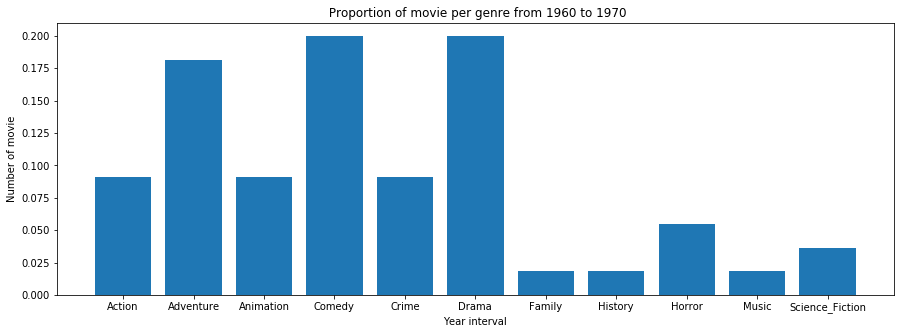

In [45]:
df_60 = df_pop[df_pop['year_interval']=="60's"].groupby(['genres']).count()['id'] 
total_60 = df_pop.groupby(['year_interval']).count().id["60's"]

Action=df_60[0]/total_60
Adventure=df_60[1]/total_60
Animation=df_60[2]/total_60
Comedy=df_60[3]/total_60
Crime=df_60[4]/total_60
Drama=df_60[5]/total_60
Family=df_60[6]/total_60
History=df_60[7]/total_60
Horror=df_60[8]/total_60
Music=df_60[9]/total_60
ScienceFiction=df_60[10]/total_60

plt.subplots(figsize=(15, 5))
plt.bar(["Action", "Adventure", "Animation", "Comedy", "Crime", "Drama", "Family", "History", "Horror", "Music", "Science_Fiction"], 
           [Action, Adventure, Animation, Comedy, Crime, Drama, Family, History, Horror, Music, ScienceFiction],)
plt.title(" Proportion of movie per genre from 1960 to 1970")
plt.xlabel("Year interval")
plt.ylabel("Number of movie")

>**1960 and 1970**: the 3 top categories were: **Adventure, Comedy** and **Drama**. After that was **Action, Animation** and **Crime**.

Text(0,0.5,'Number of movie')

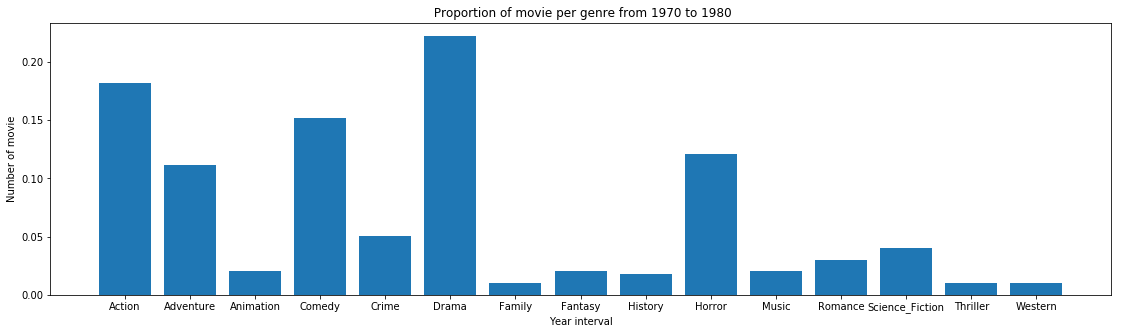

In [46]:
df_70 = df_pop[df_pop['year_interval']=="70's"].groupby(['genres']).count()['id']
total_70 = df_pop.groupby(['year_interval']).count().id["70's"]

Action=df_70[0] /total_70          
Adventure=df_70[1] /total_70          
Animation=df_70[2]/total_70           
Comedy=df_70[3]/total_70              
Crime=df_70[4] /total_70              
Drama=df_70[5]/total_70               
Family=df_70[6] /total_70             
Fantasy=df_70[7]/total_70             
Horror=df_70[8] /total_70             
Music=df_70[9] /total_70              
Romance=df_70[10]/total_70              
ScienceFiction=df_70[11] /total_70    
Thriller=df_70[12]  /total_70           
Western=df_70[13] /total_70 

plt.subplots(figsize=(19, 5))
plt.bar(["Action", "Adventure", "Animation", "Comedy", "Crime", "Drama", "Family", "Fantasy", "History", "Horror", "Music","Romance", "Science_Fiction","Thriller", "Western"], 
           [Action, Adventure, Animation, Comedy, Crime, Drama, Family, Fantasy, History, Horror, Music, Romance, ScienceFiction, Thriller,Western],)
plt.title(" Proportion of movie per genre from 1970 to 1980")
plt.xlabel("Year interval")
plt.ylabel("Number of movie")

>**1970-1980**:Over the following decade, may more categories are added but only Horror movie are more popular. The top 3 are **Drama**, **Action** and **Comedy**. After come **Horror**, **Adventure** and **Crime**

Text(0,0.5,'Number of movie')

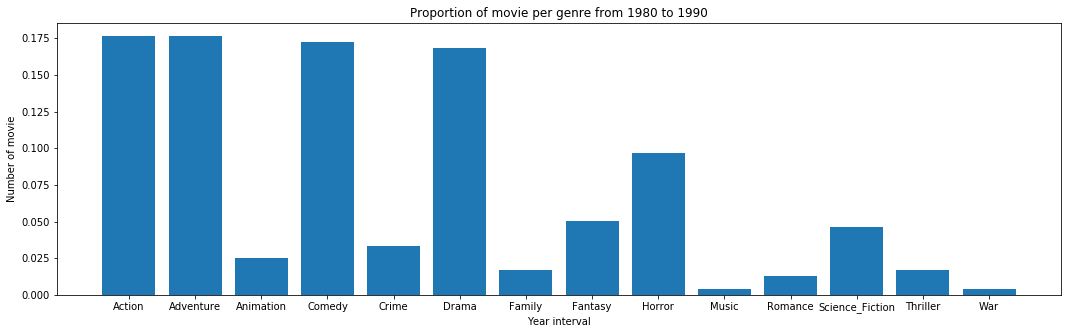

In [47]:
df_80 = df_pop[df_pop['year_interval']=="80's"].groupby(['genres']).count()['id'] 
total_80 = df_pop.groupby(['year_interval']).count().id["80's"]

Action=df_80[0]/total_80           
Adventure=df_80[1] /total_80         
Animation=df_80[2]/total_80           
Comedy=df_80[3]/total_80             
Crime=df_80[4] /total_80              
Drama=df_80[5]  /total_80            
Family=df_80[6]  /total_80            
Fantasy=df_80[7] /total_80            
Horror=df_80[8]  /total_80           
Music=df_80[9] /total_80             
Romance=df_80[10] /total_80            
ScienceFiction=df_80[11] /total_80   
Thriller=df_80[12] /total_80            
War=df_80[13] /total_80

plt.subplots(figsize=(18, 5))
plt.bar(["Action", "Adventure", "Animation", "Comedy", "Crime", "Drama", "Family", "Fantasy", "Horror", "Music","Romance", "Science_Fiction","Thriller", "War"], 
           [Action, Adventure, Animation, Comedy, Crime, Drama, Family, Fantasy, Horror, Music, Romance, ScienceFiction, Thriller,War],)
plt.title("Proportion of movie per genre from 1980 to 1990")
plt.xlabel("Year interval")
plt.ylabel("Number of movie")

>**1980-1990**: Here we have less categories. There in an increase in popularity for **Adventure**, **Comedy**  which are in top 3 with **Action**, and a slight decrease for **Drama** which is very close to the top 3, followed by **Horror** and **Science_Fiction**.

Text(0,0.5,'Number of movie')

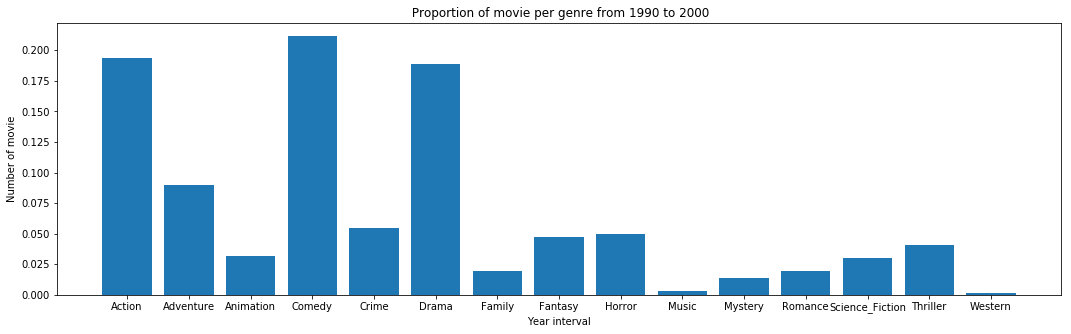

In [48]:
df_90 = df_pop[df_pop['year_interval']=="90's"].groupby(['genres']).count()['id'] 
total_90 = df_pop.groupby(['year_interval']).count().id["90's"]

Action=df_90[0]/total_90           
Adventure=df_90[1] /total_90         
Animation=df_90[2]/total_90           
Comedy=df_90[3]/total_90             
Crime=df_90[4] /total_90              
Drama=df_90[5]  /total_90            
Family=df_90[6]  /total_90            
Fantasy=df_90[7] /total_90
History=df_90[8] /total_90
Horror=df_90[9]  /total_90           
Music=df_90[10] /total_90
Mystery=df_90[11] /total_90
Romance=df_90[12] /total_90            
ScienceFiction=df_90[13] /total_90   
Thriller=df_90[14] /total_90            
Western=df_90[15] /total_90

plt.subplots(figsize=(18, 5))
plt.bar(["Action", "Adventure", "Animation", "Comedy", "Crime", "Drama", "Family", "Fantasy", "Horror", "Music","Mystery", "Romance", "Science_Fiction","Thriller", "Western"], 
           [Action, Adventure, Animation, Comedy, Crime, Drama, Family, Fantasy, Horror, Music, Mystery, Romance, ScienceFiction, Thriller,Western],)
plt.title(" Proportion of movie per genre from 1990 to 2000")
plt.xlabel("Year interval")
plt.ylabel("Number of movie")

> **1990-2000**: Here the top 3 are **Action**, **Comedy**, and **Drama**. the next 2 are **Adventure** and **Crime**.

Text(0,0.5,'Number of movie')

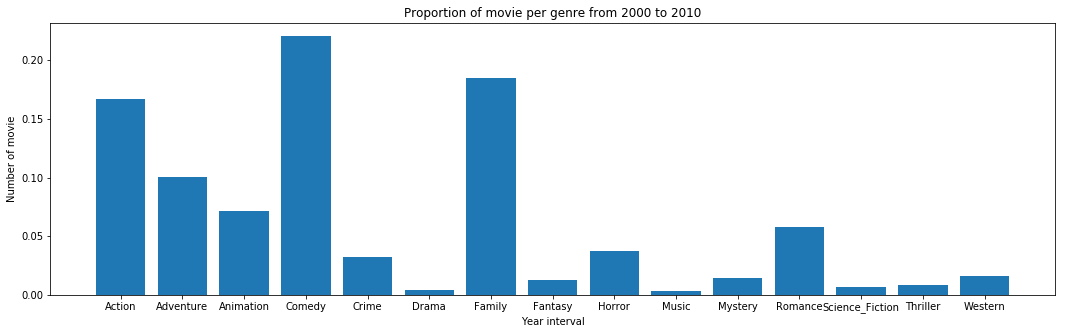

In [49]:
df_2000 = df_pop[df_pop['year_interval']=="2000's"].groupby(['genres']).count()['id'] 
total_2000 = df_pop.groupby(['year_interval']).count().id["2000's"]

Action=df_2000[0]/total_2000           
Adventure=df_2000[1] /total_2000         
Animation=df_2000[2]/total_2000           
Comedy=df_2000[3]/total_2000             
Crime=df_2000[4] /total_2000              
Drama=df_2000[5]  /total_2000            
Family=df_2000[6]  /total_2000            
Fantasy=df_2000[7] /total_2000
Horror=df_2000[8]  /total_2000           
Music=df_2000[9] /total_2000
Romance=df_2000[10] /total_2000            
ScienceFiction=df_2000[11] /total_2000   
Thriller=df_2000[12] /total_2000            
Western=df_2000[13] /total_2000

plt.subplots(figsize=(18, 5))
plt.bar(["Action", "Adventure", "Animation", "Comedy", "Crime", "Drama", "Family", "Fantasy", "Horror", "Music","Mystery", "Romance", "Science_Fiction","Thriller", "Western"], 
           [Action, Adventure, Animation, Comedy, Crime, Drama, Family, Fantasy, Horror, Music, Mystery, Romance, ScienceFiction, Thriller,Western],)
plt.title("Proportion of movie per genre from 2000 to 2010")
plt.xlabel("Year interval")
plt.ylabel("Number of movie")          

>**2000-2010**: Here the smaller categories are almost inexistent. the top 3 are **Comedy**, **Family**, and **Action**. The 3 following are **Adventure**, **Animation** and **Romance**.

Text(0,0.5,'Number of movie')

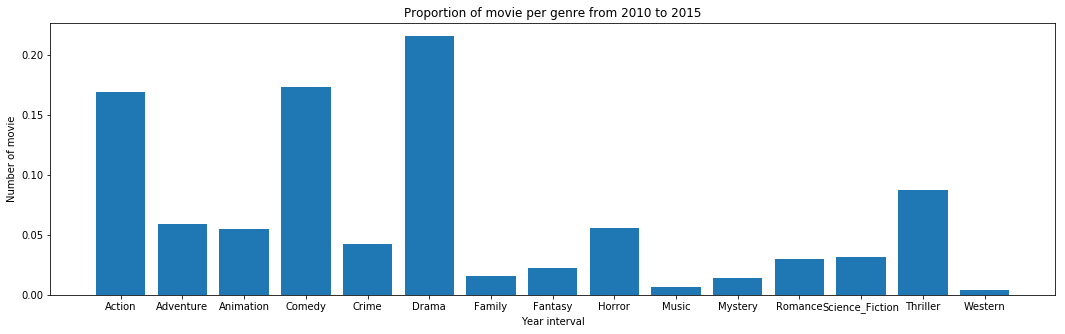

In [50]:
df_2010 = df_pop[df_pop['year_interval']=="2010's"].groupby(['genres']).count()['id'] 
total_2010 = df_pop.groupby(['year_interval']).count().id["2010's"]

Action=df_2010[0]/total_2010           
Adventure=df_2010[1] /total_2010         
Animation=df_2010[2]/total_2010           
Comedy=df_2010[3]/total_2010             
Crime=df_2010[4] /total_2010
Documentary=df_2010[5]  /total_2010  
Drama=df_2010[6]  /total_2010            
Family=df_2010[7]  /total_2010            
Fantasy=df_2010[8] /total_2010
History=df_2010[9] /total_2010
Horror=df_2010[10]  /total_2010           
Music=df_2010[11] /total_2010
Mystery=df_2010[12] /total_2010
Romance=df_2010[13] /total_2010            
ScienceFiction=df_2010[14] /total_2010   
Thriller=df_2010[15] /total_2010
War=df_2010[16] /total_2010
Western=df_2010[17] /total_2010

plt.subplots(figsize=(18, 5))
plt.bar(["Action", "Adventure", "Animation", "Comedy", "Crime", "Drama", "Family", "Fantasy", "Horror", "Music","Mystery", "Romance", "Science_Fiction","Thriller", "Western"], 
           [Action, Adventure, Animation, Comedy, Crime, Drama, Family, Fantasy, Horror, Music, Mystery, Romance, ScienceFiction, Thriller,Western],)
plt.title("Proportion of movie per genre from 2010 to 2015")
plt.xlabel("Year interval")
plt.ylabel("Number of movie")

>**2010-2015**: the top 3 are **Drama**, **Comedy** and **Action**, followed by Thriller, Adventure and Horror.

>According to our charts these are top categories for each decade:

>**1960 and 1970**: **Adventure, Comedy** and **Drama**. After that was **Action, Animation** and **Crime**.

>**1970-1980**: **Drama**, **Action** and **Comedy**. After come **Horror**, **Adventure** and **Crime**.

>**1980-1990**: **Adventure**, **Comedy** and **Action**, then **Drama** , **Horror** and **Science_Fiction**.

> **1990-2000**: **Action**, **Comedy**, and **Drama**, next  **Adventure** and **Crime**.

>**2000-2010**: **Comedy**, **Family**, and **Action**, then **Adventure**, **Animation** and **Romance**.

>**2010-2015**: **Drama**, **Comedy** and **Action**, followed by **Thriller**, **Adventure** and **Horror**.


### Conclusion for Question 1: According to our findings, these are the types of movie that are more popular from year to year and are always on top: Adventure, Comedy, Drama, Action. 



### Research Question 2: What are the properties associated with movies with high revenues?

>To reply to this question, we will analyse a dataset containing only movies with high revenues. Let's reduce the data to movies with high revenue: higher that the mean.

In [51]:
mean_rev = df['revenue'].mean()
mean_rev

61972712.644286893

In [52]:
df_rev = df[df['revenue']>mean_rev]
df_rev.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,year_interval
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action,6/9/15,5562,6.5,2015,2010's
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,2010's
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure,3/18/15,2480,6.3,2015,2010's
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action,12/15/15,5292,7.5,2015,2010's
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action,4/1/15,2947,7.3,2015,2010's


>We would like to create a new column with Month release. This will allow us to determine if that variable can influence the revenue. We will limit ourselves to the Month number.

In [53]:
df_rev.loc[:,'month_release'] = df_rev.loc[:,'release_date'].apply(lambda x: x.split("/")[0])

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [54]:
df_rev.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,year_interval,month_release
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action,6/9/15,5562,6.5,2015,2010's,6
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action,5/13/15,6185,7.1,2015,2010's,5
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure,3/18/15,2480,6.3,2015,2010's,3
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action,12/15/15,5292,7.5,2015,2010's,12
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action,4/1/15,2947,7.3,2015,2010's,4


>Now let's analyse our numerical variables. In the following lines, we will create the chart showing the correlation(if exists) between each variable and the revenue. By observing this, we will determine which variable might influence the revenue.

In [55]:
#creting the serie of numerica variables
num_var = ['popularity', 'budget', 'runtime', 'vote_count','vote_average', 'release_year']

In [56]:
#defining a function to avoid repetition of the same line for each variable
def num_func(var):
    return df_rev.plot(x=var, y='revenue', kind = 'scatter')

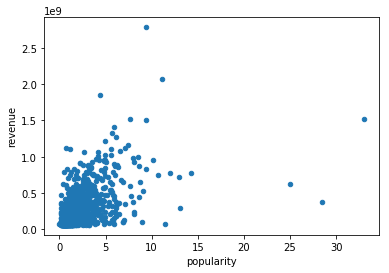

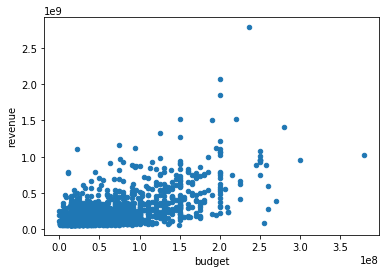

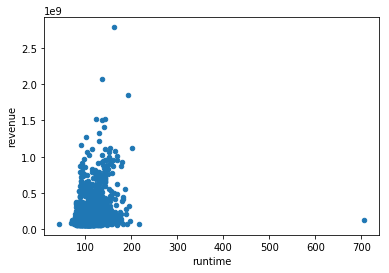

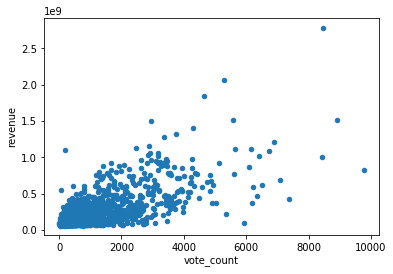

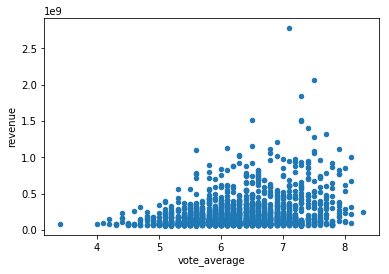

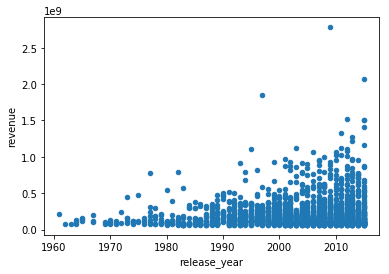

In [58]:
#creating the chart for each variable
for var in num_var:
    num_func(var)

>By observing these chart, we can say that there might be a slight correlation between revenue and **budget**, also between revenue and **vote_count**. Let's calculate the correlation coefficient. This funstion has been picked from the following blog:
https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

In [58]:
df_rev.corr(method ='kendall')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,0.034750,0.051089,-0.051369,-0.120292,0.056525,-0.097149,0.549815
popularity,0.034750,1.000000,0.243853,0.383856,0.118720,0.631333,0.267737,0.211525
budget,0.051089,0.243853,1.000000,0.384045,0.147490,0.301945,-0.047873,0.232124
revenue,-0.051369,0.383856,0.384045,1.000000,0.134482,0.453099,0.144127,0.078451
runtime,-0.120292,0.118720,0.147490,0.134482,1.000000,0.154849,0.283206,-0.045953
vote_count,0.056525,0.631333,0.301945,0.453099,0.154849,1.000000,0.320524,0.287698
vote_average,-0.097149,0.267737,-0.047873,0.144127,0.283206,0.320524,1.000000,-0.042077
release_year,0.549815,0.211525,0.232124,0.078451,-0.045953,0.287698,-0.042077,1.000000


> According to this table, there is a correlation between revenue and **vote_count**(0.45), **budget**(0.38), **popularity**(0.38). For those 3 the correlation exists but is not very strong(coeffiscient not bigger than 0.5).

>Now let's analyse categorical variables

In [61]:
#set of variables
cat_var=['genres','year_interval','month_release']

In [62]:
#defining function to transform data and create a plot
def cat_func(var):
    return df_rev.groupby([var]).count().id.plot(x=var, y='revenue', kind='bar')

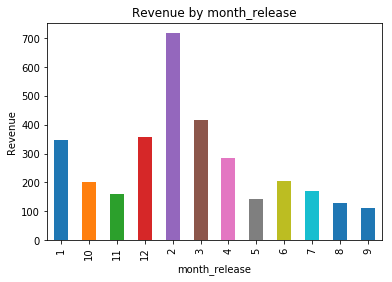

In [63]:
for var in cat_var:
    cat_func(var)
    plt.title('Revenue by {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('Revenue')

Text(0,0.5,'Revenue')

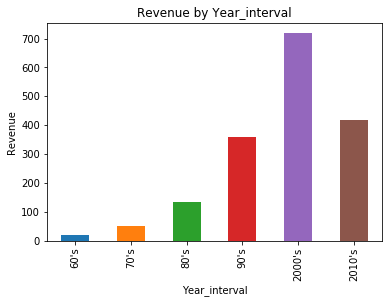

In [64]:
cat_func('year_interval')
plt.title('Revenue by Year_interval')
plt.xlabel('Year_interval')
plt.ylabel('Revenue')

Text(0,0.5,'Revenue')

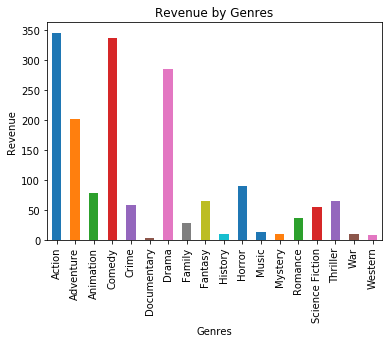

In [65]:
cat_func('genres')
plt.title('Revenue by Genres')
plt.xlabel('Genres')
plt.ylabel('Revenue')

> Looking a the charts, we can say that **after 80's** the movie industry has been producing a lot of revenue. In terms of month release, the movies with high revenue are released in **December and June**. Last but not least of categorical variables: the genres. According to our chart, the movie genres with the highest revenue are **Action, Adventure, Comedy and Drama**.

### Conclusion for Question 2: According to our analysis, every year the overall revenue for movie industry increases. However, the ones with the most revenue are with high budget, good popularity, are released in December and June, and belong to these categories: Action, Adventure, Comedy and Drama.


>These movie genres remind us of the categories with the most popularity. Besides, the chart previously analysed and the coefficient calculated showed that there is a strong correlation between renenue and vote_count, which has a strong correlation with popularity (0.63). Let's investigate this more.

### Research Question 3: Do all popular movie always generate high revenue?

>To reply to this question, we will investigate movies with high popularity and those with high revenue. The first step would be to use a scatter plot to see if there is correlation and if yes, which type. the second will be to calculate correlation coefficient to determine how strong it is.

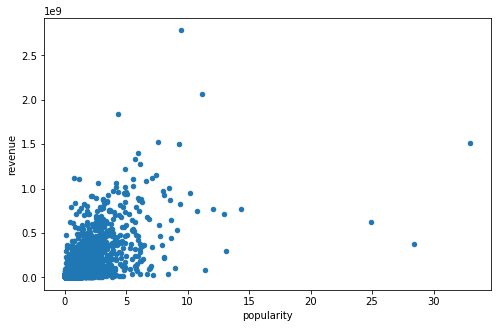

In [66]:
df.plot(x='popularity', y='revenue', kind='scatter', figsize=(8, 5))

> According to the scatter plot the correlation exist but it not linear, and it is not very strong or very clear. Let's calculate coefficients for popular movies.

In [72]:
# correlation coefficients for popular movies
df_pop.corr(method='kendall')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,-0.023371,-0.076682,-0.159141,-0.147258,-0.070603,-0.135582,0.632611
popularity,-0.023371,1.000000,0.258382,0.372982,0.144912,0.556979,0.197030,0.099062
budget,-0.076682,0.258382,1.000000,0.467177,0.218308,0.331653,-0.045987,0.074359
revenue,-0.159141,0.372982,0.467177,1.000000,0.188027,0.454729,0.091315,-0.029076
runtime,-0.147258,0.144912,0.218308,0.188027,1.000000,0.216077,0.244826,-0.059819
vote_count,-0.070603,0.556979,0.331653,0.454729,0.216077,1.000000,0.287241,0.119491
vote_average,-0.135582,0.197030,-0.045987,0.091315,0.244826,0.287241,1.000000,-0.099123
release_year,0.632611,0.099062,0.074359,-0.029076,-0.059819,0.119491,-0.099123,1.000000


> Like for movies with high revenue, the correlation coefficient between popularity and revenue show and slight correlation (0.37) in the dataset for popular movies. Let's investigate this more.

> Let's calculate the **Pearson's Correlation coefficient** to dertermine if there is correlation. The method I'm about to apply has been taken from this blog: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
> The theory says : if the result is 0, then there is no correlation. It the result is below -0.5 or above 0.5, it indicates a notable correlation, and values between those values suggests a less notable correlation.

In [73]:
#importing the library first
from scipy.stats import pearsonr

In [74]:
# Calculating the Pearson's correlation coefficient
corr, _ = pearsonr(df['popularity'], df['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.635


> In this case the correlation is **0.635** which is higher than 0.5, this prooves that there is a notable correlation between popularity and revenue. However, looking at the scatter plot we did, we can see that the correlation is not linear. According to the aboved mentioned blog, we can use the **Spearman's Correlation coefficient** to summarize the strengh between two data samples.

In [75]:
#importing the library
from scipy.stats import spearmanr

In [76]:
# Calculating the spearmans's correlation
corr,_ = spearmanr(df['popularity'], df['revenue'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.280


> The Spearman’s correlation coefficient is **0.280**. This show there is a correlation (<>0). However, because the coefficient is < 0.5, we conclude than the correlation between both is not obvious, or is not very strong.

### Conclusion for Question 3: There is a correlation between popular movies and high revenue, although is it not linear and it is not very strong. So, there is a big chance for popular movies to generate high revenues.

<a id='intro'></a>
## General Conclusion
> From years to years, popular movies have been in these categories: **Action, Drama, Adventure** and **Comedy**. Movies with high revenue have been proven to be from high investments(**budget**), **very popular**, and released in **December** or **June**. This lead us to an analysis which showed that Popular movies have a big chance to generate high revenue, even if the correlation is not linear or very strong. This might be because there are other factors which affect the revenue. This can also be because of the nature of the data.
> There were some limitations in our analysis due to the fact that the column for budget and revenue had a lot of missing values. Those were replaced  by means. This can be the reason why, the correlation was not very clear.